# Introducción kafka
El problema que soluciona kafka es el siguiente

Si se tiene varias aplicaciones que requiere intercambiar datos entre todas ellas se vuelve demasiado complicado

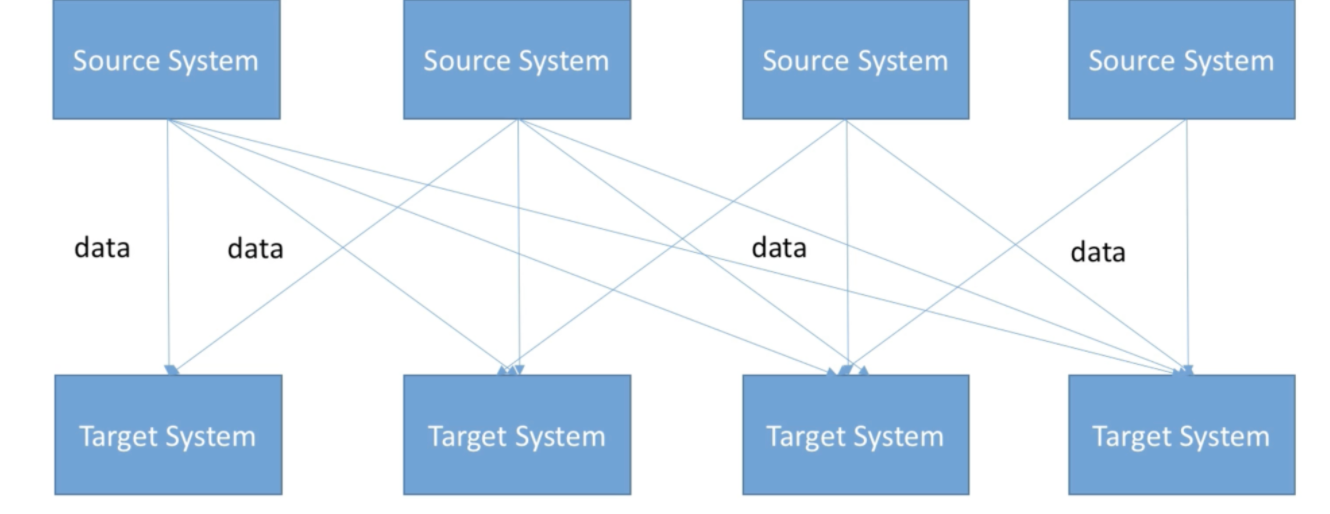


Con kafka se soluciona este problema desacomplando las aplicaciones. Kafka proporcionar una plataforma unificada, de alto rendimiento y de baja latencia para la manipulación en tiempo real de fuentes de datos. Puede verse como una cola de mensajes, bajo el patrón publicación-suscripción, masivamente escalable concebida como un registro de transacciones distribuidas

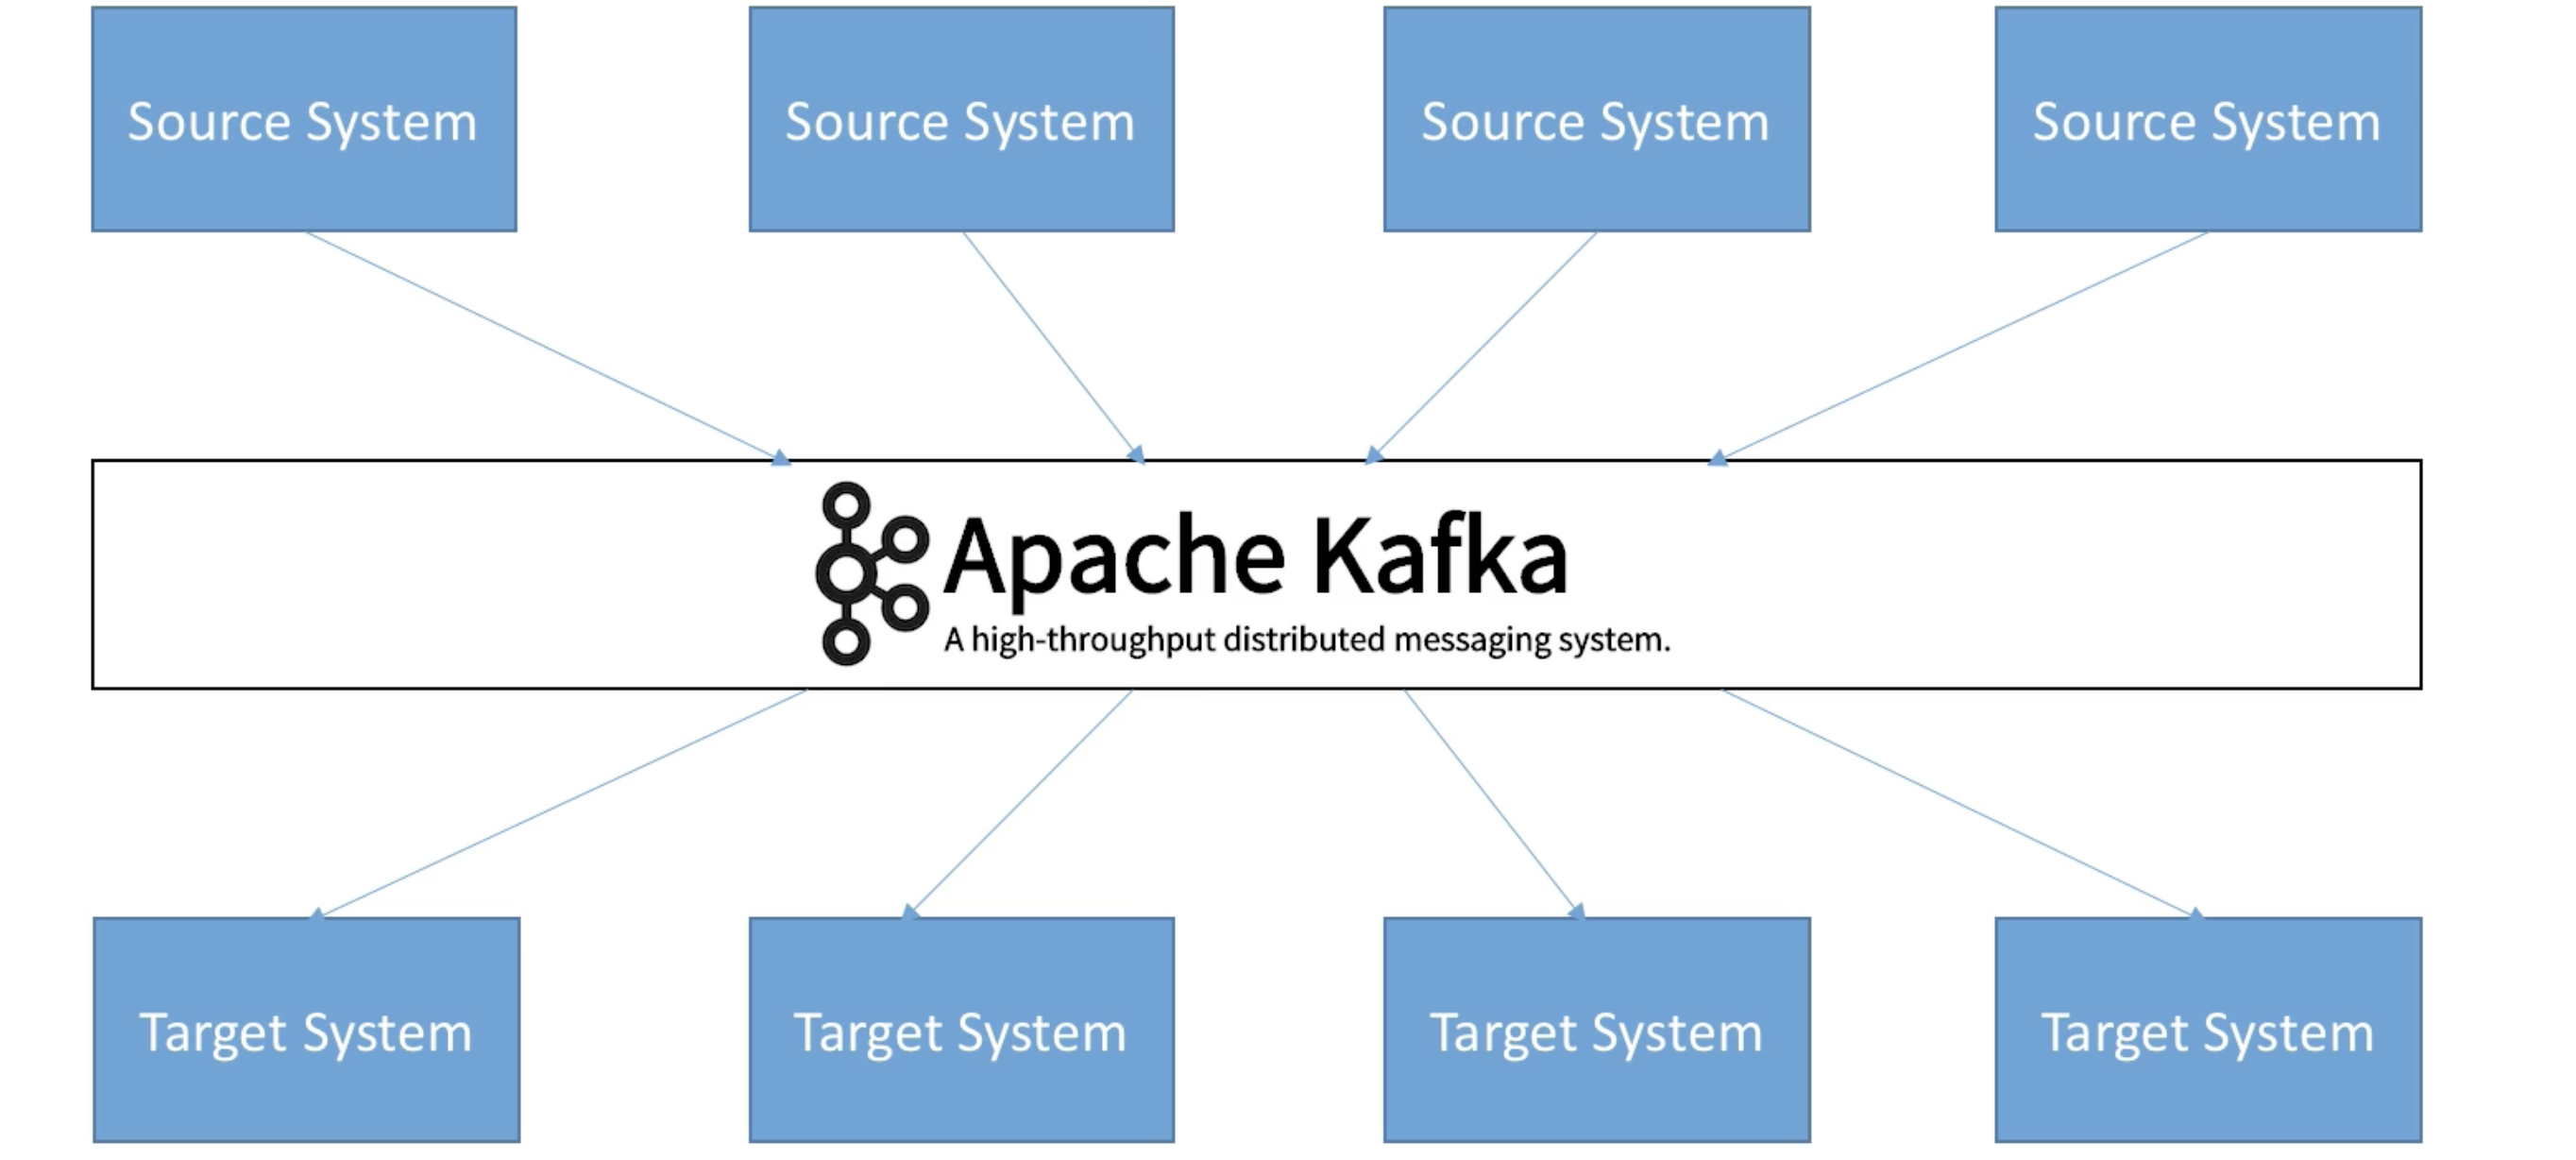

## Topis, Partirtitions y offsets

- **Topic**: es un stream de datos.
    - Es similar a una tabla de base de datos (sin todas las limitaciones)
    - Se puede tener los topics que se quiera
    - Un topic se identifica con un nombre (se puede poner cualquiera)
- **Partitions**: los topics se divide en partitions
    - Cada partición esta ordenada (0,1,2,etc...)
    - Cada mensaje dentro de una partition contiene un ID llamado offset para identificar cada mensaje
    - A la hora de crear un topic es necesario poner si o si el número de particiones. Esto se puede modificar una vez creado
- **Offset**:
    - Offset se incrementa automáticamente y no hay limites
    - Para identificar cada offset es necesario completarlo con el topic y partitition, es decir un offset 0 de la partición 1 será distinto a un offset 0 de la partición 2. 
    
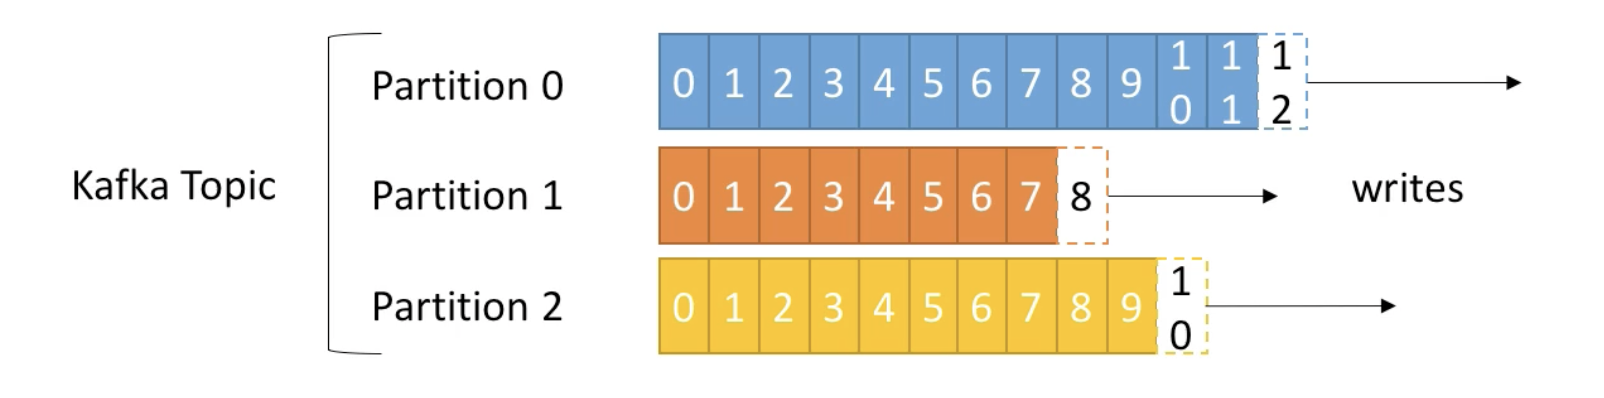
Cosas a tener en cuenta:
- El orden solo estará garantizado dentro de una partition 
- La información solo se queda guardada por defecto 1 semana, después se borra
- Una vez que los datos entrá en una partition no se puede modificar (inmutabilidad)
- Los datos se asignan aleatoriamente a una partición a menos que se proporcione una key

## Brokers and Topics

El funcionamiento de Kafka se base en un cluster. Este cluster se compone de **brokers** (un servidor)
- Cada broker es identificado por un número
- Cada broker contiene solo ciertas partitions de un topic, es decir la información de un topic estará en varios brokers, pero un broker puede no contener toda la información de un topic
- Se puede tener tanto brokers como se quiera

El funcionamiento de brokers es el siguiente:
- Se tiene tres brokers y en el Topic-A con tres particiones
    - Kafka ya reparte automáticamente de manera equitativa en que partición irá cada broker
- Se tiene tres brokers y en el Topic-B con dos particiones
    - El broker 103 no tendrá nada de información sobre el Topic-B
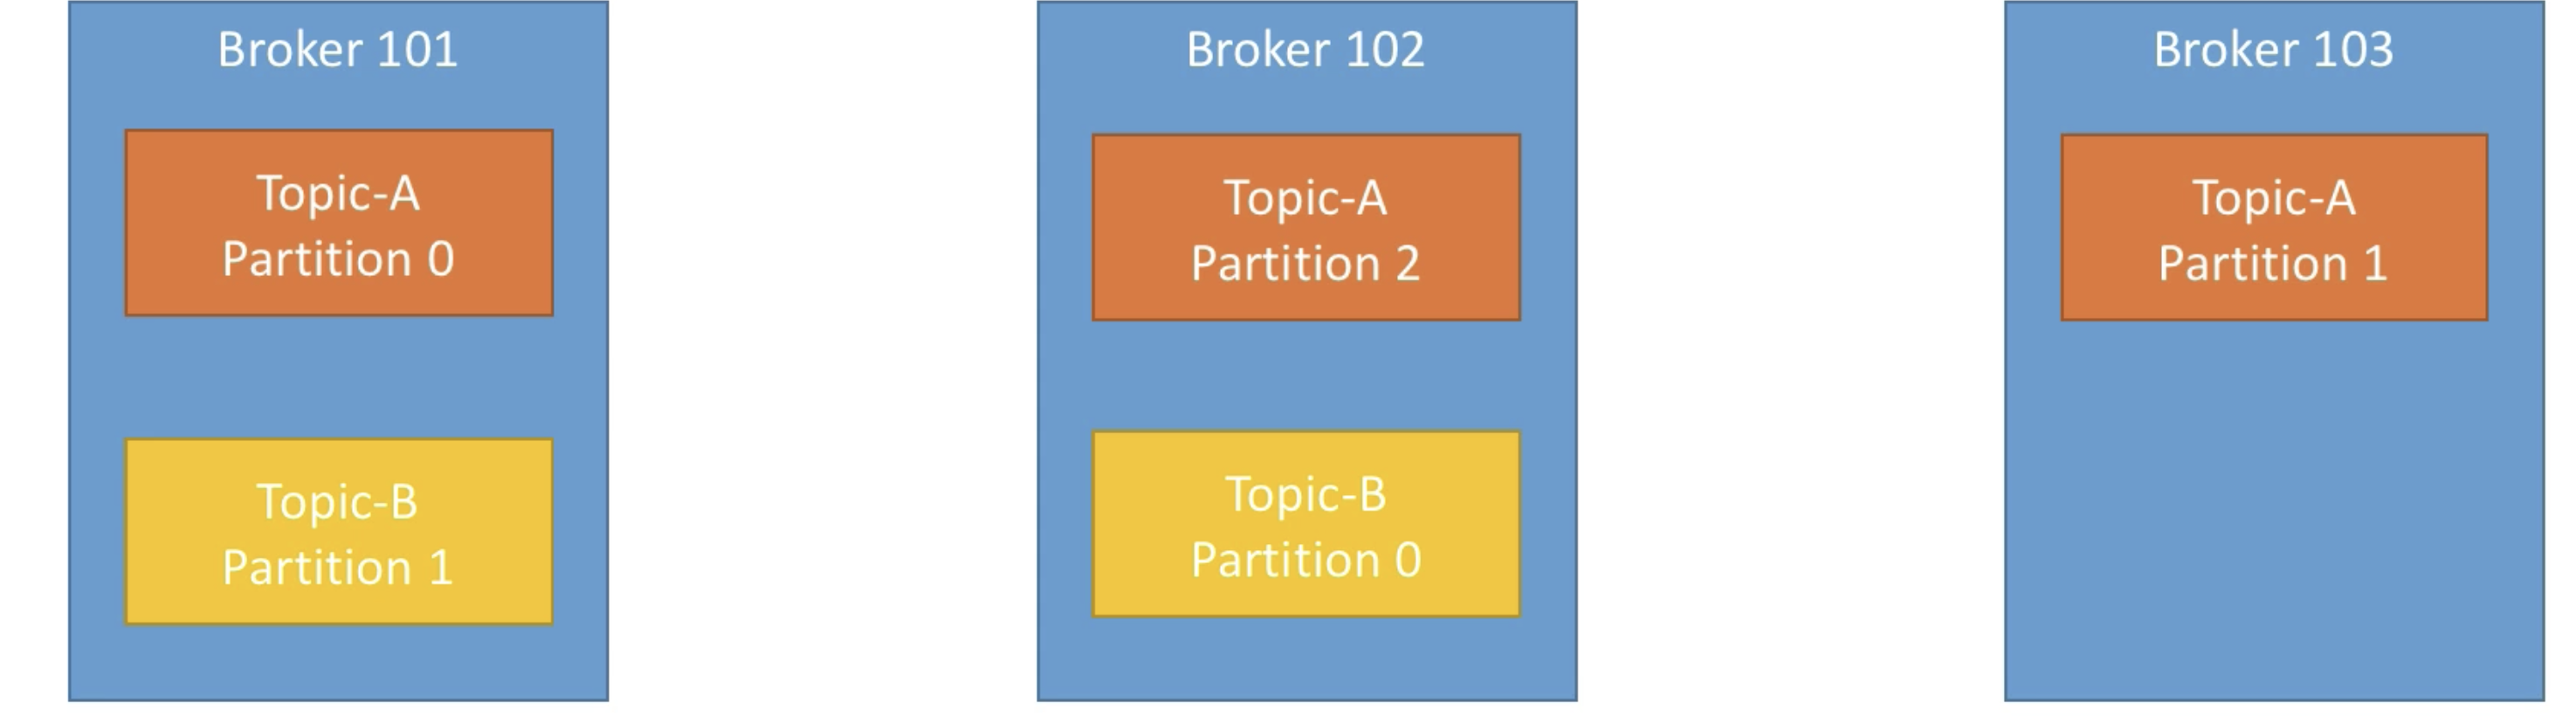


## Topic replication factor

A ser un sistema distribuido es importante la replicación por si hay algún fallo que siga funcionando. Normalmente entre 2 y 3 topics replicado es lo ideal.

En este ejemplo se tiene una replicación en 2 con un topic de dos particiones. De esta manera si se cae un broker sea el que sea seguiría con un 100% de funcionamiento


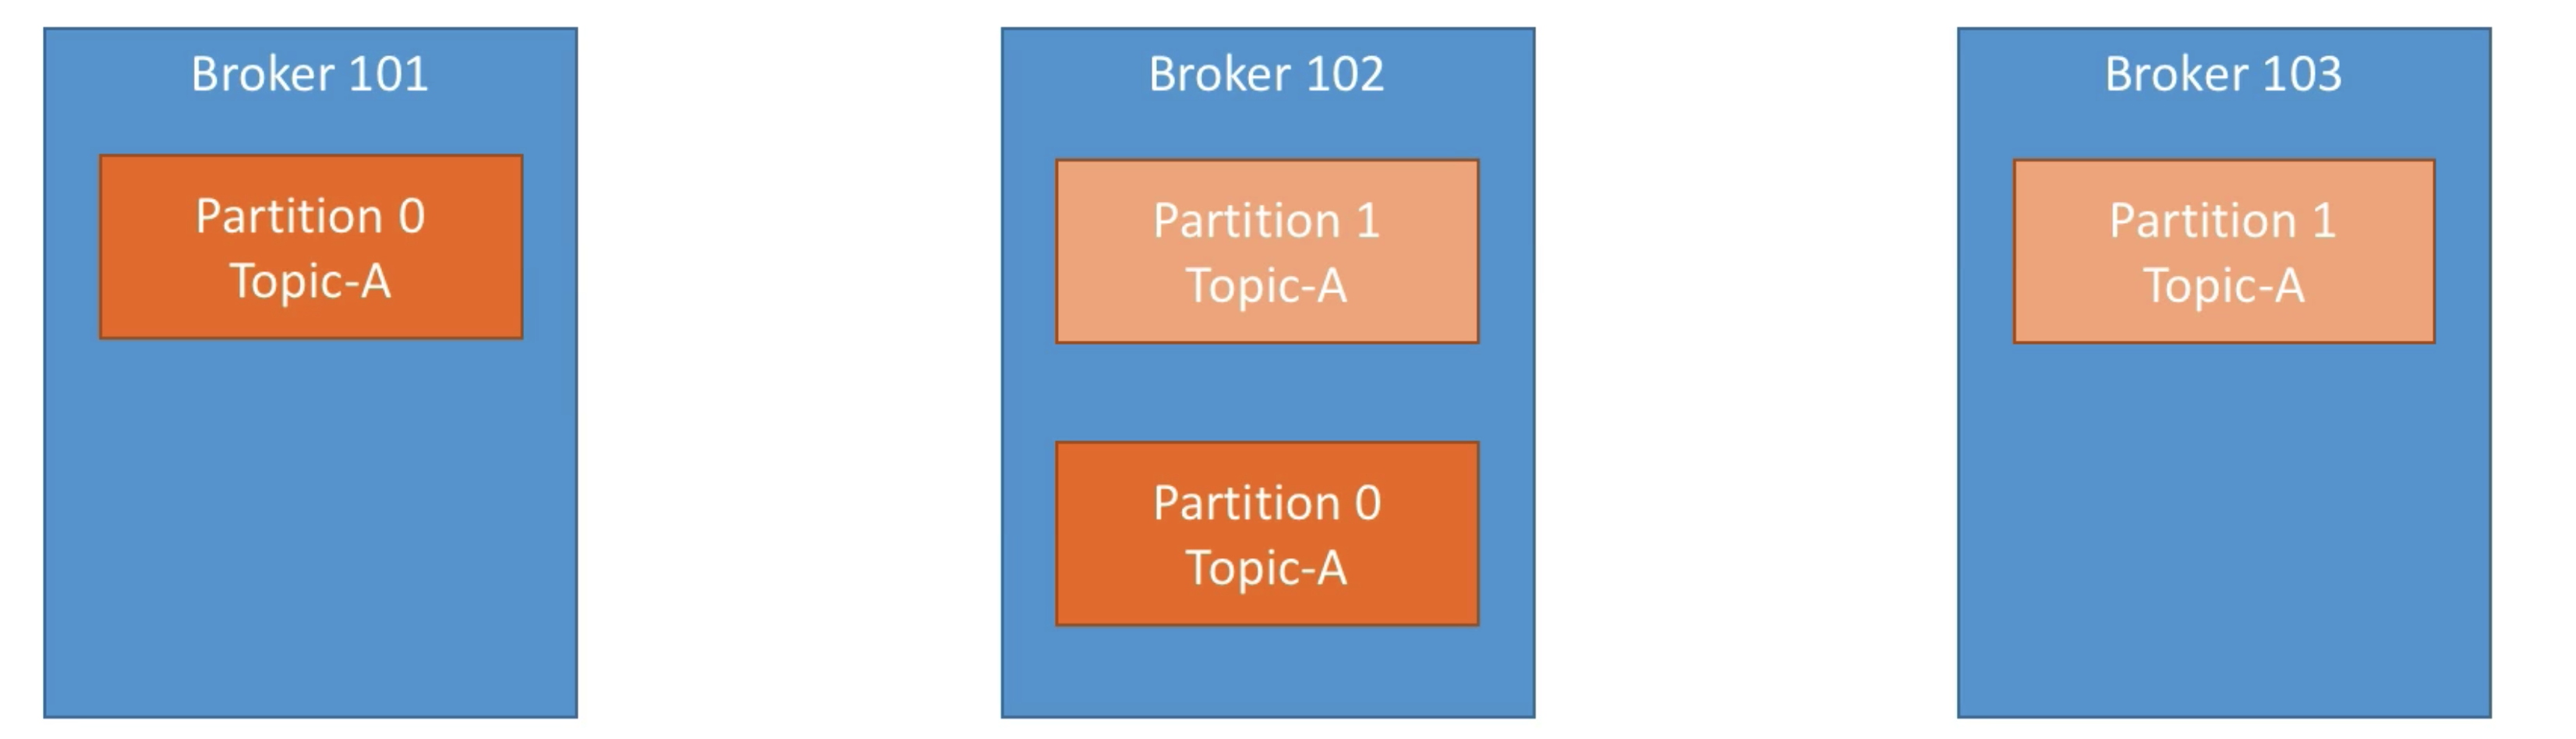

A la hora de replicar, siempre hay un líder. Un líder solo está en una partition y sólo ese líder puede recibir y servir datos para una partición. Las otras son replicas que se sincroniza con los datos. Estás replicas recibe el nombre de ISR (in-sync-replica)

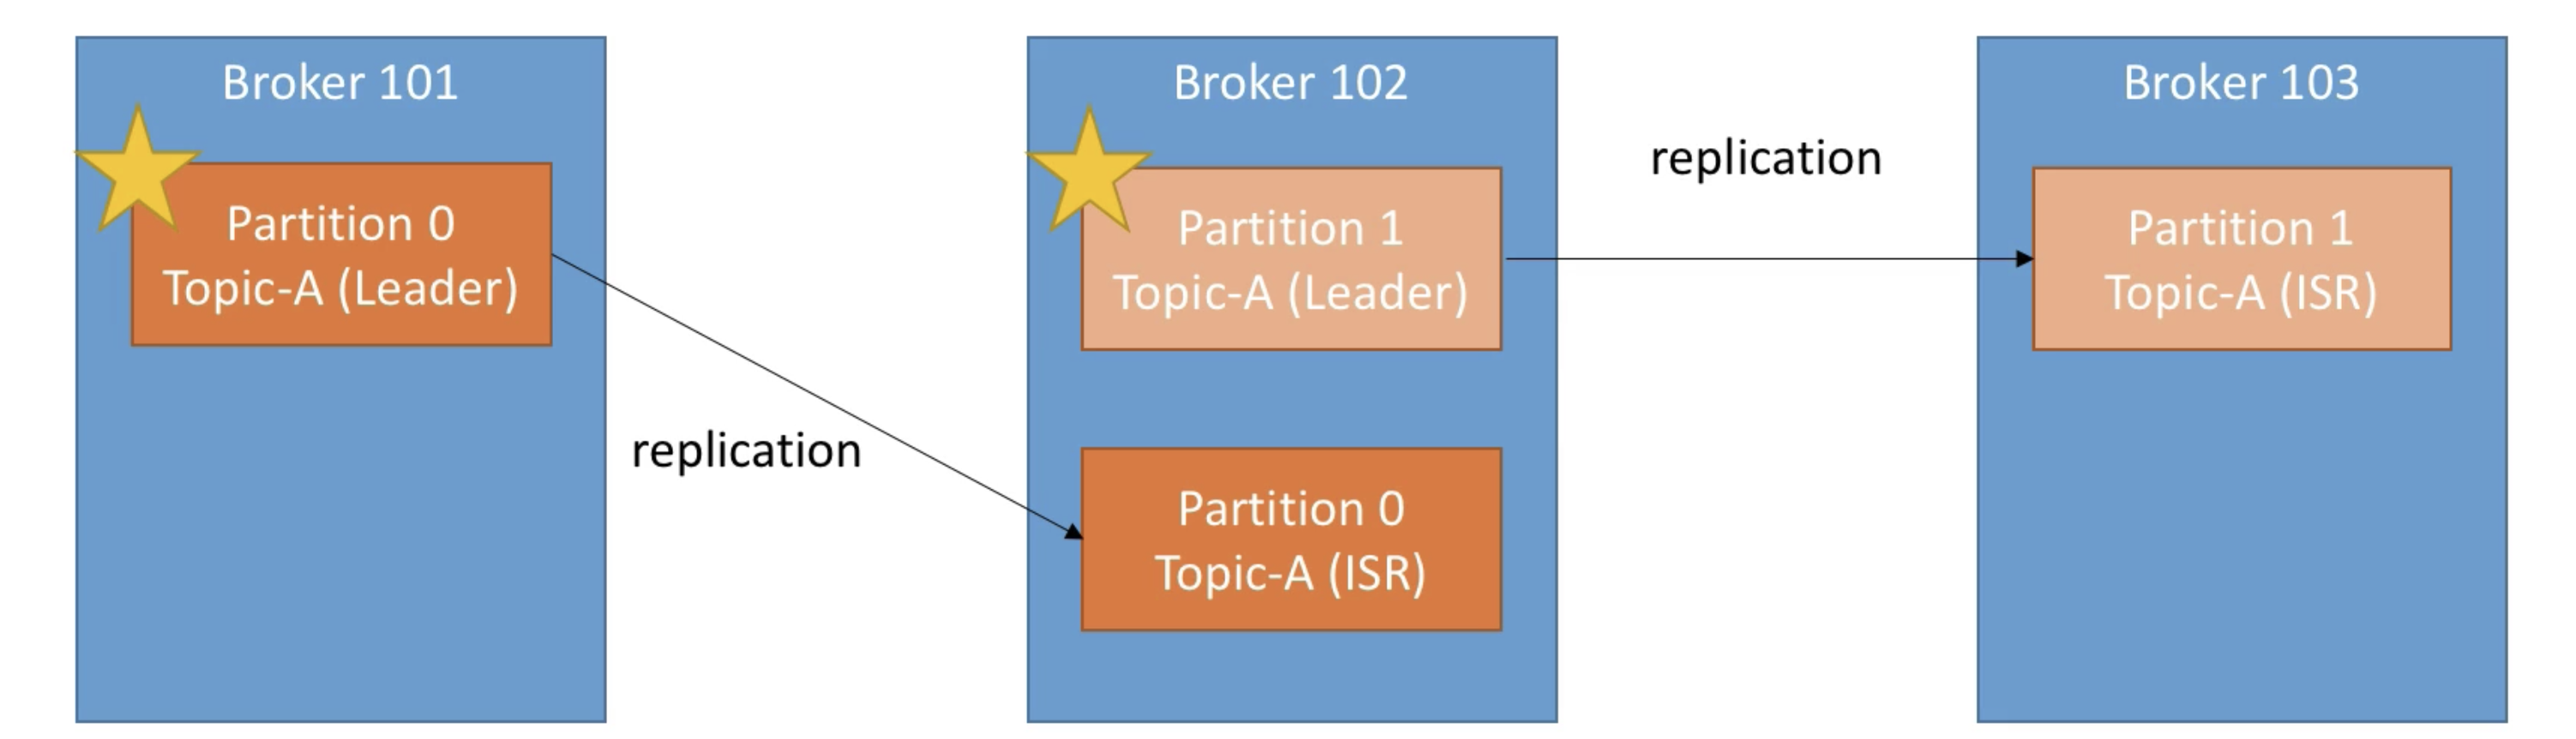

A la hora de elegir líder o decidir cual va ser el siguiente líder se hace a través de Zookeper. En este caso si se cae la partition TOPIC-A del broker 101, pasaría a ser el líder el broker 102